# 01 - Data Exploration

### two core datasets are explored

#### - `samples_labeled.csv` — texts with assigned task labels
#### - `glossary.csv` — glossary terms and their simplified meanings


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Dataset Summary

In [ ]:
samples_df = pd.read_csv('../data/samples_labeled.csv')
glossary_df = pd.read_csv('../data/glossary.csv')

print(samples_df.shape)
print(glossary_df.shape)

In [ ]:
samples_df.head()
glossary_df.head()

In [ ]:
samples_df.describe()
glossary_df.describe()

In [ ]:
samples_df.info()
glossary_df.info()


In [ ]:
samples_df.columns

In [ ]:
glossary_df.columns

##### check for null and duplicate values

In [ ]:
print("Samples nulls:\n", samples_df.isnull().sum())
print("Glossary nulls:\n", glossary_df.isnull().sum())

print("Duplicate sentences:", samples_df.duplicated().sum())
print("Duplicate glossary terms:", glossary_df.duplicated().sum())

##### check for and drop missing values

In [ ]:
# Check for missing values
samples_df.isnull().sum()

# Drop rows/columns with missing values
samples_df.dropna(inplace=True)

# Fill missing values
samples_df.fillna(value=0, inplace=True)  # numeric
samples_df['sentence'].fillna('Unknown', inplace=True)


In [ ]:
# Check for missing values
glossary_df.isnull().sum()

# Drop rows/columns with missing values
glossary_df.dropna(inplace=True)

# Fill missing values
glossary_df.fillna(value=0, inplace=True)  # numeric
glossary_df['term'].fillna('Unknown', inplace=True)


##### samples_labeled Analysis

In [56]:
samples_df.loc[samples_df['sentence'].str.len().idxmax()]
samples_df.loc[samples_df['sentence'].str.len().idxmin()]

sentence    Install a medication reminder app
category                             reminder
Name: 36, dtype: object

In [57]:
samples_df.info()
samples_df['category'].value_counts()
samples_df['sentence'].str.len().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  50 non-null     object
 1   category  50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes


count    50.000000
mean     45.080000
std       6.442334
min      33.000000
25%      41.000000
50%      44.000000
75%      49.000000
max      61.000000
Name: sentence, dtype: float64

##### Label Distribution

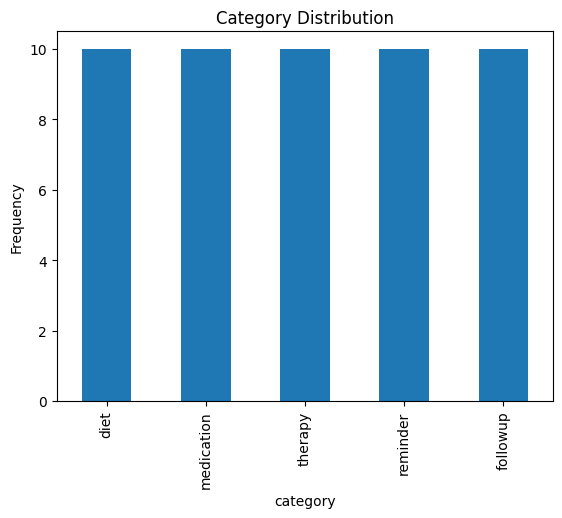

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

samples_df['category'].value_counts().plot(kind='bar', title='Category Distribution')
plt.ylabel('Frequency')
plt.show()
plt.savefig('../visualizations/category_distribution.png')


#### glossary Analysis

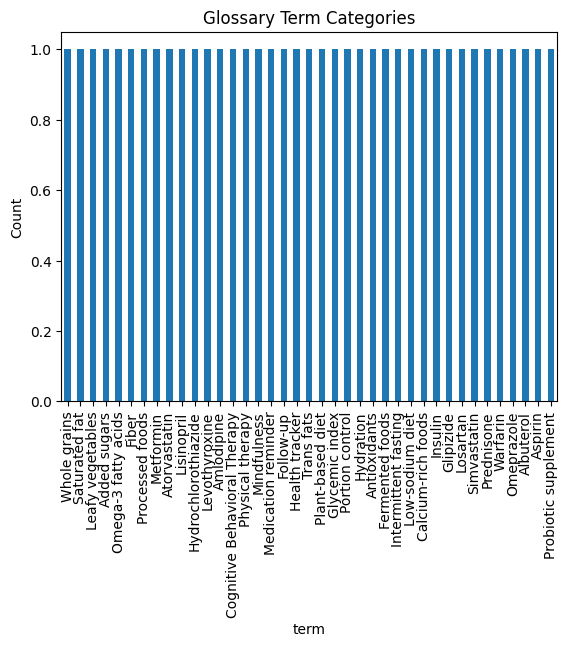

C:\Users\Kannan\AppData\Local\Temp\ipykernel_3152\1531913541.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  glossary_df.groupby('term').apply(lambda x: x.sample(n=min(3, len(x)))).reset_index(drop=True)


,term,description
0,Added sugars,Sugars added to foods that can lead to weight ...
1,Albuterol,A medication used to relieve asthma symptoms
2,Amlodipine,A medication used to treat high blood pressure...
3,Antioxidants,Compounds in foods that protect cells from damage
4,Aspirin,Used in low doses to prevent heart attacks and...
5,Atorvastatin,A medication used to lower cholesterol levels
6,Calcium-rich foods,"Foods that help maintain strong bones, like da..."
7,Cognitive Behavioral Therapy,"A talk therapy for managing anxiety, depressio..."
8,Fermented foods,Foods like yogurt and kimchi that support gut ...
9,Fiber,Carbohydrate that helps digestion and controls...


In [60]:
glossary_df['term'].value_counts().plot(kind='bar', title='Glossary Term Categories')
plt.ylabel('Count')
plt.show()

# Show a few entries per category
glossary_df.groupby('term').apply(lambda x: x.sample(n=min(3, len(x)))).reset_index(drop=True)


##### glossary Term Coverage in samples_labeled

In [62]:
# Count how many glossary terms are matched in each sample text
glossary_terms = glossary_df['term'].tolist()

def count_term_matches(text):
    return sum(1 for term in glossary_terms if term.lower() in text.lower())

samples_df['glossary_matches'] = samples_df['sentence'].apply(count_term_matches)
samples_df['glossary_matches'].describe()


count    50.000000
mean      0.340000
std       0.478518
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: glossary_matches, dtype: float64

##### rows with high and low glossary matches

In [64]:
# Show a few rows with high and low glossary matches
samples_df.sort_values('glossary_matches', ascending=False).head(5)[['sentence', 'category', 'glossary_matches']]
samples_df[samples_df['glossary_matches'] == 0].sample(3)[['sentence', 'category']]


,sentence,category
9,Eat fatty fish like salmon twice a week,diet
37,Use sticky notes as visual medication prompts,reminder
17,Take your cholesterol medication even if you f...,medication
